In [67]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

In [69]:
def grab(fname):
    '''
    Reads an input file and returns an array of pressure values
    '''
    np.genfromtxt(fname, delimeter=' ', encoding='utf-8',dType=None, usecols=[1])



In [71]:
series = np.genfromtxt(fname='series_9.txt')

In [73]:
print(series)

[98.185524 98.190697 98.190796 98.189598 98.187157 98.183762 98.185303
 98.188377 98.188622 98.186325 98.187401 98.188499 98.185501 98.185158
 98.186325 98.188599 98.185768 98.183884 98.184303 98.185547 98.182938
 98.186356 98.184227 98.187767 98.184059 98.187622 98.189476 98.19043
 98.186378 98.188797 98.18882  98.185959 98.186424 98.188721 98.187401
 98.186401 98.184494 98.187668 98.183792 98.183228 98.186111 98.185036
 98.182274 98.185303 98.184914 98.186424 98.185814 98.185593 98.185646
 98.186569 98.187424 98.182373 98.186668 98.187523 98.190575 98.185814
 98.187912 98.186279 98.18718  98.186569 98.187721 98.187622 98.183205
 98.183739 98.181686 98.184204 98.18911  98.184402 98.1884   98.184402
 98.18782  98.185135 98.184982 98.18811  98.184692 98.190506 98.187378
 98.18528  98.185257 98.187233 98.189552 98.185715 98.187477 98.184402
 98.186668 98.181717 98.186844 98.184937 98.184303 98.186691 98.184738
 98.184715 98.187454 98.187279 98.187233 98.188332 98.191185 98.185326
 98.188

In [75]:
N_list = np.array([1,2,3,4,5,10,15,20,25,30])


stdev = np.zeros(N_list.size)
avg = np.zeros(N_list.size)
stder = np.zeros(N_list.size)

for N in range(N_list.size):
    n = int(N_list[N])
    sz = int(series.size/n)
    l = np.zeros(sz)
    for i in range(sz):
        l[i]= np.sum(series[i*n:n*(i+1)])/n
    stdev[N-1] = np.std(l)
    stder[N-1] = stdev[N-1]/(np.sqrt(float(n)))
    avg[N-1] = np.sum(l)/sz

l = np.zeros(10)
for i in range(10):
    l[i]= np.sum(series[i*30:30*(i+1)])/30
stdev[-1] = np.std(l)
stder[-1] = stdev[-1] / 10
avg[-1] = np.sum(l)/10


In [77]:
print(stdev)
print(avg)

[0.00157348 0.00134005 0.00113692 0.00099151 0.00063544 0.00050828
 0.00039489 0.00039449 0.00041209 0.00041209]
[98.18657943 98.18657943 98.18657943 98.18657943 98.18657943 98.18657943
 98.18657943 98.18657943 98.18657943 98.18657943]


In [79]:
def plotty(array1, array2, units, spot):
    '''
    Built for stdev/stder and avg plotting
    '''
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=[8,5])
    ax1.plot(N_list, array1, '.-', label='stdev')
    ax1.set_xlabel('Subset Size N')
    ax1.set_ylabel(rf'stder (${units}$)')
    ax1.set_title('stder as a function of subset size N')
    ax2.set_title('avg as a function of subset size N')
    ax2.plot(N_list, array2, 'g.--', label='avg')
    ax2.set_ylabel(rf'avg (${units}$)')
    ax2.set_xlabel('Subset Size N')
    fig.tight_layout()
    return fig


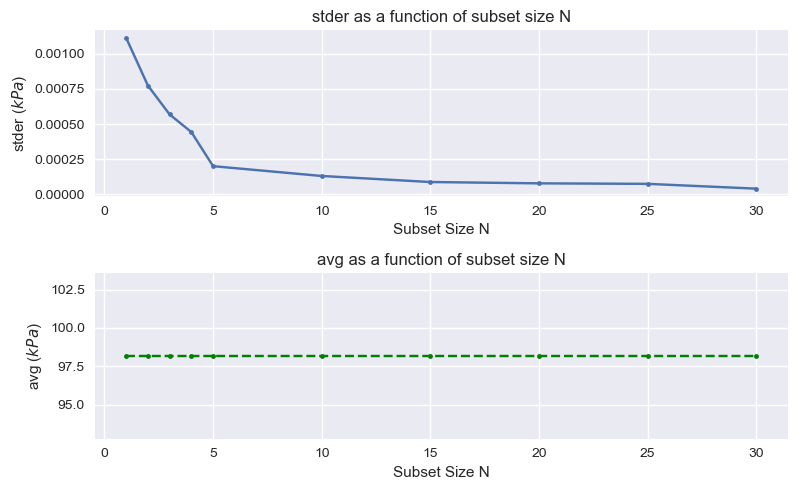

In [81]:
flig = plotty(stder, avg, "kPa")
plt.savefig(f'task6{spot}.png')

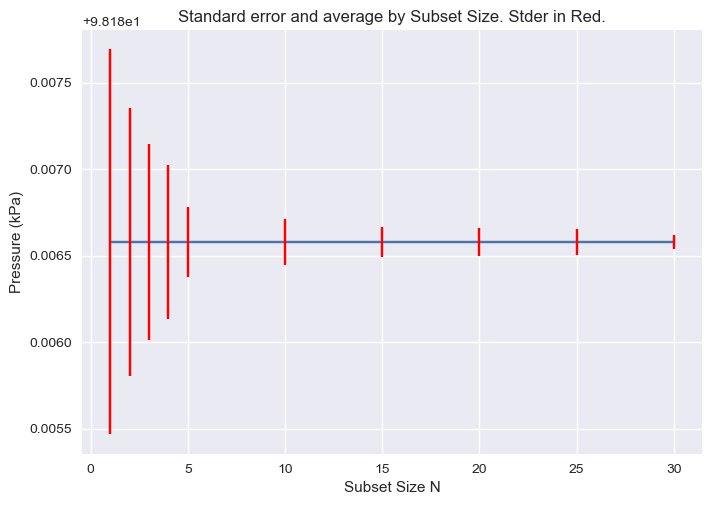

In [83]:
filg, ax = plt.subplots(1,1)
ax.errorbar(N_list, avg,yerr=stder, ecolor='red', barsabove=True)
ax.set_title('Standard error and average by Subset Size. Stder in Red.')
ax.set_xlabel('Subset Size N')
ax.set_ylabel('Pressure (kPa)')
filg.savefig(f'stder_subsize{spot}.png')


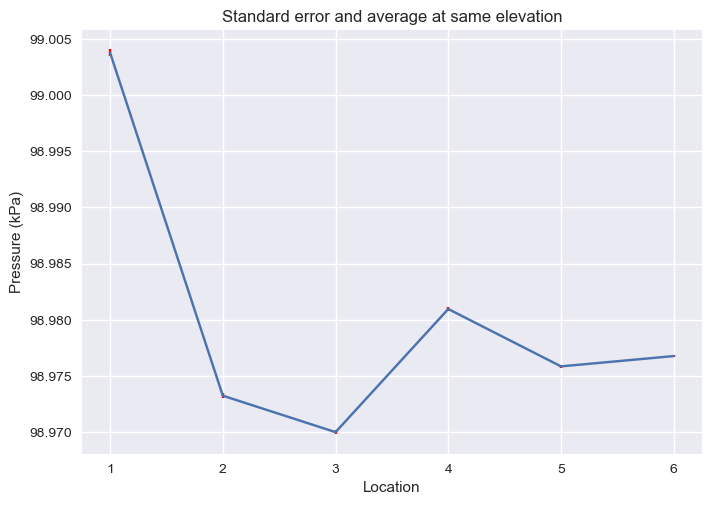

In [118]:
# need to turn into loc list as we go along so that i can plot these accurately using the stdev and averages using N=30 for each location
#TASK 8
ser8 = np.genfromtxt('task8.txt')
NSE=30
stdevSE = np.zeros(6) #storing avg
stderSE = np.zeros(6) #storing avg
avgSE = np.zeros(6) #storing avg

for i in range(6):
    l = ser8[i*NSE:NSE*(i+1)]
    #print(l)
    stdevSE[i] = np.std(l)
    #print(stdevSE[i])
    stderSE[i] = stdev[i]/(np.sqrt(float(NSE)))
    #print(stderSE[i])
    avgSE[i] = np.sum(l)/NSE
    #print(avgSE[i])

xSE=np.arange(1,7)


figSE, axSE = plt.subplots(1,1)
axSE.errorbar(xSE,avgSE,yerr=stderSE, ecolor='red')
axSE.set_title('Standard error and average at same elevation')
axSE.set_xlabel('Location')
axSE.set_ylabel('Pressure (kPa)')
figSE.savefig('task8.png')

In [116]:
print(np.abs(avgSE[5]-avgSE[4])/stderSE[1])
print("is the smallest difference in standard errors between elevation differences.")
print(np.abs(avgSE[0]-avgSE[2])/stderSE[1])
print("is the largest difference in standard errors between elevation differences.")


3.747118095307664
is the smallest difference in standard errors between elevation differences.
137.94825275492323
is the largest difference in standard errors between elevation differences.


Standard Deviation at 0cm | Average Pressure at 0cm
0.001945008 kPa               98.97678 kPa

Standard Deviation at 10cm | Average Pressure at 10cm
0.001884636 kPa               98.97491 kPa

Standard Deviation at 20cm | Average Pressure at 20cm
0.001838915 kPa               98.96914 kPa

Standard Deviation at 50cm | Average Pressure at 50cm
0.002196808 kPa               98.96291 kPa

Standard Deviation at 100cm | Average Pressure at 100cm
0.002281021 kPa               98.95600 kPa

Standard Deviation at 200cm | Average Pressure at 200cm
0.001377863 kPa               98.94215 kPa



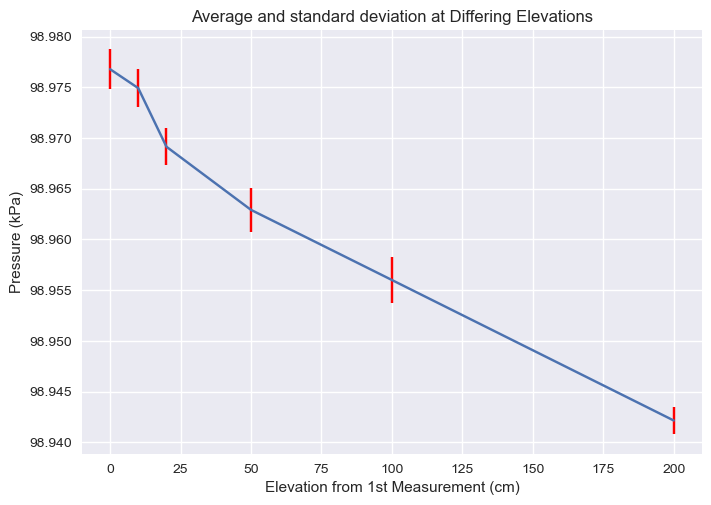

In [218]:
#TASK 8
ser9 = np.genfromtxt('task9.txt')
NDE=30
stdevDE = np.zeros(6) #storing avg
stderDE = np.zeros(6) #storing avg
avgDE = np.zeros(6) #storing avg
xDE=np.array([0,10,20,50,100,200])


for i in range(6):
    l = ser9[i*NDE:NDE*(i+1)]
    #print(l)
    stdevDE[i] = np.std(l)    
    
    stderDE[i] = stdev[i]/(np.sqrt(float(NDE)))
    #print(stderDE[i])
    avgDE[i] = np.sum(l)/NDE
    print(f'Standard Deviation at {xDE[i]}cm | Average Pressure at {xDE[i]}cm')
    print(f'{stdevDE[i]:.9f} kPa               {avgDE[i]:.5f} kPa')
    print()


figDE, axDE = plt.subplots(1,1)
axDE.errorbar(xDE,avgDE,yerr=stdevDE, ecolor='red')
axDE.set_title('Average and standard deviation at Differing Elevations')
axDE.set_xlabel('Elevation from 1st Measurement (cm)')
axDE.set_ylabel('Pressure (kPa)')
figDE.savefig('task9.png')

Responsivity of Altimeter: in Pa/m
   0cm         10cm        20cm        50cm        100cm       200cm
[[ 0.         -0.09337    -0.1910925  -0.13867133 -0.103906   -0.08657933]
 [-0.09337     0.         -0.288815   -0.14999667 -0.10507667 -0.08622193]
 [-0.1910925  -0.288815    0.         -0.10372389 -0.08210937 -0.07496676]
 [-0.13867133 -0.14999667 -0.10372389  0.         -0.06914067 -0.06921533]
 [-0.103906   -0.10507667 -0.08210937 -0.06914067  0.         -0.06925267]
 [-0.08657933 -0.08622193 -0.07496676 -0.06921533 -0.06925267  0.        ]]


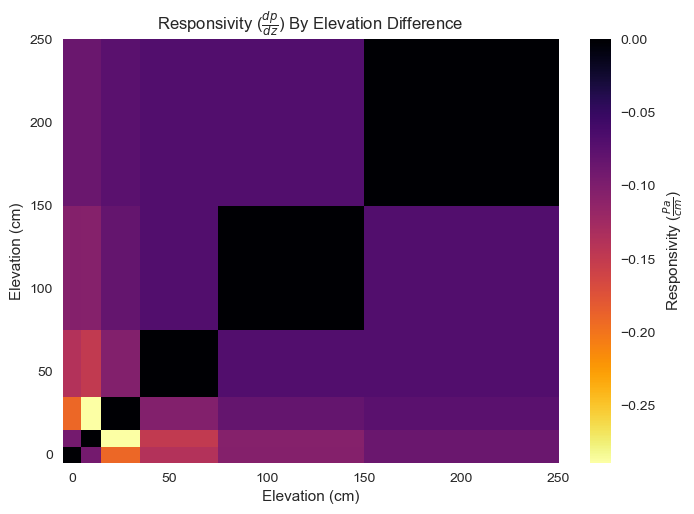

In [196]:
dpDZ = np.zeros([6,6])

for j in range(6):
    for k in range(6):
        if j != k:
            dpDZ[j,k] = (avgDE[k] - avgDE[j]) / (2 * (xDE[k] - xDE[j]))
            #print(avgDE[j] - avgDE[k])
            #print(xDE[j] - xDE[k])
            #print()

print('Responsivity of Altimeter: in Pa/m')
print('   0cm         10cm        20cm        50cm        100cm       200cm')
print(dpDZ * 1000)

figP, axP = plt.subplots(1,1)
resp = axP.pcolor(xDE,xDE,dpDZ*1000, cmap='inferno_r')
axP.set_xlabel('Elevation (cm)')
axP.set_ylabel('Elevation (cm)')
axP.set_title(r'Responsivity ($\frac{dp}{dz}$) By Elevation Difference')
cbar = plt.colorbar(resp)
cbar.set_label(r'Responsivity ($\frac{Pa}{cm}$)')
figP.savefig('task10.png')

-0.1141425413333333


Text(0.5, 0, 'Responsivity ($\\frac{Pa}{cm}$)')

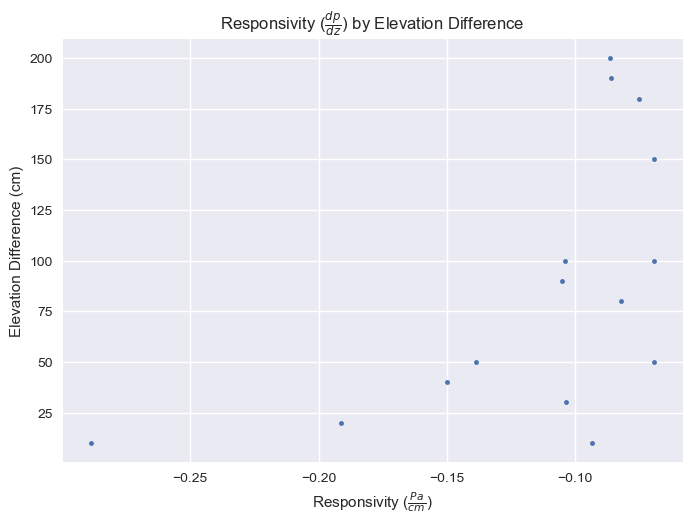

In [260]:
dPDelZ = [-0.09337, -0.1910925, -0.13867133, -0.103906, -0.08657933, -0.288815, -0.14999667, -0.10507667, \
      -0.08622193, -0.10372389, -0.08210937, -0.07496676, -0.06914067, -0.06921533, -0.06925267]
h = [10,20,50,100,200, 10, 40, 90, 190, 30, 80, 180, 50, 150, 100]
figl, axl = plt.subplots(1,1)
axl.plot(dPDelZ,h, '.')
axl.set_title(r'Responsivity ($\frac{dp}{dz}$) by Elevation Difference')
axl.set_ylabel('Elevation Difference (cm)')
axl.set_xlabel(r'Responsivity ($\frac{Pa}{cm}$)')

0.0018846363518972128
[-1.68638161e-04  9.89743297e+01]


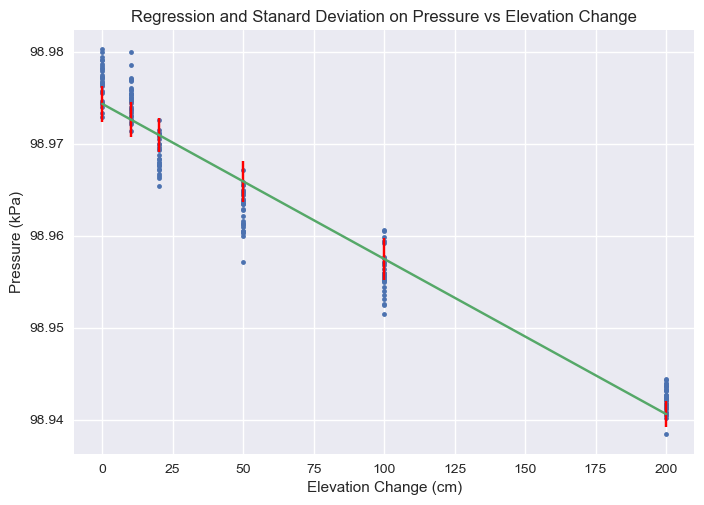

In [276]:

#plot regression; use the split to plot and then use lin regression ez style
xDER=np.zeros(180)
xDER[0:30] = 0
xDER[30:60] = 10
xDER[60:90] = 20
xDER[90:120] = 50
xDER[120:150] = 100
xDER[150:180] = 200

#plot stdev of stuff across line points after polynomial fit

deg = 1 #regression 
coeffs = np.polyfit(xDER, ser9, deg)
pass_lin = np.polyval(coeffs, xDER)

#condenses regression for errorbar plotting
regression = [pass_lin[29], pass_lin[59], pass_lin[89], pass_lin[119], pass_lin[149], pass_lin[179]] 

error_R = np.zeros(6)
print(np.std(ser9[30:60]))
error_R[0] = np.std(ser9[:30]) 
error_R[1] = np.std(ser9[30:60])
error_R[2] = np.std(ser9[60:90])
error_R[3] = np.std(ser9[90:120])
error_R[4] = np.std(ser9[120:150])
error_R[5] = np.std(ser9[150:180])

print(coeffs)

figR, axR = plt.subplots(1,1)
#plot original data minus polynomial fit
axR.plot(xDER, ser9, '.')
axR.errorbar(xDE, regression, yerr=error_R, ecolor='red')
axR.set_title('Regression and Stanard Deviation on Pressure vs Elevation Change')
axR.set_xlabel('Elevation Change (cm)')
axR.set_ylabel('Pressure (kPa)')
figR.savefig('task11.png')

In [272]:
coeffs = sp.stats.linregress(xDER, ser9)
print(coeffs)
#average stdeviation
stdevR = np.sum(error_R) /6
print(stdevR)

LinregressResult(slope=-0.00016863816052226424, intercept=98.97432972238866, rvalue=-0.9706209406886152, pvalue=4.612851467850361e-112, stderr=3.1334061259066404e-06, intercept_stderr=0.0002944957270043915)
0.0019207086148571187
